In [1]:
# project: p9
# submitter: zchen697
# partner: none

In [2]:
import csv
import copy 
import matplotlib
import pandas

In [3]:
# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

In [4]:
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [5]:
# copied from https://automatetheboringstuff.com/chapter14/
def get_mapping(path):
    exampleFile = open(path, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    dict_data = {}
    for key in range(len(exampleData)):
        dict_data[exampleData[key][0]] = exampleData[key][1]
    return dict_data
    

In [6]:
# copied from https://automatetheboringstuff.com/chapter14/
def get_raw_movies(path):
    exampleFile = open(path, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleHeader = exampleData[0] 
    exampleFile.close()
    dict_data = {}
    final_data = []
    for key in range(len(exampleData)):
        dict_data = {}
        for position in range(len(exampleHeader)):
            if key+1 < len(exampleData) and position <= 2 and exampleData[0][position] == "year":
                dict_data[exampleData[0][position]] = int(exampleData[key+1][position])
            elif key+1 < len(exampleData) and position <= 2 and exampleData[0][position] == "rating":
                dict_data[exampleData[0][position]] = float(exampleData[key+1][position])
            elif key+1 < len(exampleData) and position <= 2:
                dict_data[exampleData[0][position]] = exampleData[key+1][position]
            elif key+1 < len(exampleData) and position > 2:
                dict_data[exampleData[0][position]] = exampleData[key+1][position].split(",")
            if position == len(exampleHeader)-1 and key != len(exampleData)-1:
                final_data.append(dict_data) 
    return final_data

In [7]:
def get_movies(movies_path, mapping_path):
    mv_list = get_raw_movies(movies_path)
    mp_dict = get_mapping(mapping_path)
    for item in range(len(mv_list)):
        for title in range(len(mv_list[item]['actors'])):
            mv_list[item]['actors'][title] = mp_dict[mv_list[item]['actors'][title]]
        for title in range(len(mv_list[item]['directors'])):
            mv_list[item]['directors'][title] = mp_dict[mv_list[item]['directors'][title]]
        mv_list[item]['title'] = mp_dict[mv_list[item]['title']]
    return mv_list

In [8]:
movies = get_movies("movies.csv", "mapping.csv")

In [9]:
#q1

target_actors = []
for i in range(len(movies)):
    if len(movies[i]["actors"]) < 4:
        target_actors.append(movies[i]["rating"])

sum(target_actors)/len(target_actors)

6.380867346938772

In [10]:
#q2

target_greatfive = []
for i in range(len(movies)):
    if len(movies[i]["actors"]) > 5:
        target_greatfive.append(movies[i]["rating"])

sum(target_greatfive)/len(target_greatfive)

6.742857142857143

In [11]:
#q3

start_a = []
for i in range(len(movies)):
    if movies[i]["title"][0].lower() == "a":
        start_a.append(movies[i]["rating"])

sum(start_a)/len(start_a)

6.413599999999994

In [12]:
def title_rating(name):
    target_movie = {}
    for i in range(len(movies)):
        for j in range(len(movies[i]["actors"])):
            if movies[i]["actors"][j] == name:
                target_movie[movies[i]["title"]] = movies[i]["rating"]
    return target_movie

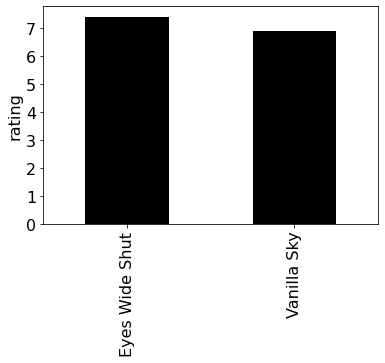

In [13]:
#q4

tom_movie = title_rating("Tom Cruise")
plot_dict(tom_movie, "rating")

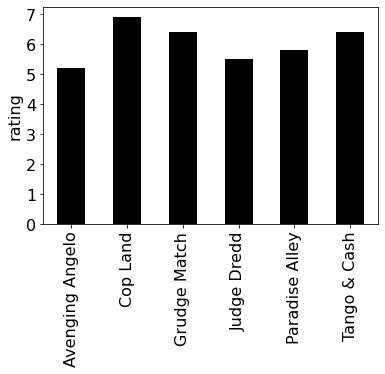

In [14]:
#q5

sylvester_movie = title_rating("Sylvester Stallone")
plot_dict(sylvester_movie, "rating")

In [15]:
def get_count(name):
    time_count = 0
    for i in range(len(movies)):
        for j in range(len(movies[i]["actors"])):
            if movies[i]["actors"][j] == name:
                time_count += 1
    return time_count

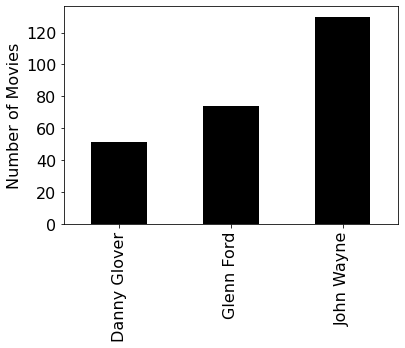

In [16]:
#q6

actor_names = ["John Wayne","Glenn Ford","Danny Glover"]

time_john = get_count("John Wayne")
time_glenn = get_count("Glenn Ford")
time_danny = get_count("Danny Glover")
target_plot = {}
times_appear = [time_john,time_glenn,time_danny]
for i in range(len(times_appear)):
    target_plot[actor_names[i]] = times_appear[i]

plot_dict(target_plot, "Number of Movies")

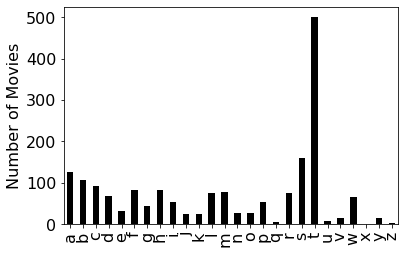

In [17]:
#q7

letters = "abcdefghijklmnopqrstuvwxyz"
letter_to_num_movies = {}
for letter in letters:
    letter_to_num_movies[letter] = 0
for i in range(len(movies)):
    for j in range(len(letters)):
        if movies[i]["title"][0].lower() == letters[j]:
            letter_to_num_movies[letters[j]] += 1
plot_dict(letter_to_num_movies, "Number of Movies")

In [18]:
#This is a function I used for p8
def unique_search(kind):
    store_value = []
    target_element = []
    final_count = 0
    for i in range(len(movies)):
        for q in range(len(movies[i][kind])):
            if not (movies[i][kind][q] in target_element):
                target_element.append(movies[i][kind][q])
    return target_element

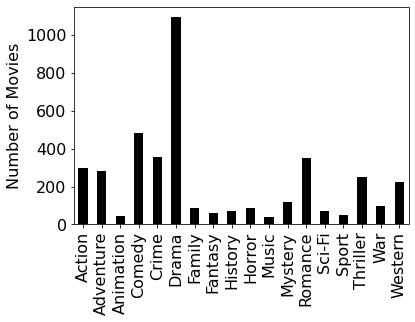

In [19]:
#q8

genre_kinds = unique_search("genres")
genre_to_num_movies = {}

for kind in genre_kinds:
    genre_to_num_movies[kind] = 0
for movie in movies:
    for genre in movie['genres']:
        genre_to_num_movies[genre] += 1
plot_dict(genre_to_num_movies,"Number of Movies")       

In [20]:
def count_alphabet(letter):
    alphabet_list = []
    for i in range(len(movies)):
        if letter == movies[i]["title"][0].lower():
            alphabet_list.append(movies[i]["rating"])
    return alphabet_list

In [21]:
#q9

letters = "abcdefghijklmnopqrstuvwyz" # No x this time!
letter_to_num_movies = {}
for letter in letters:
    letter_to_num_movies[letter] = count_alphabet(letter)
    letter_to_num_movies[letter] = sum(letter_to_num_movies[letter])/len(letter_to_num_movies[letter])

letter_to_num_movies

# Loop through movies and update letter_to_num_movies
# Go through letter_to_num_movies to find the average for each letter

{'a': 6.413599999999994,
 'b': 6.312264150943395,
 'c': 6.337362637362637,
 'd': 6.297101449275363,
 'e': 6.128125000000001,
 'f': 6.375609756097562,
 'g': 6.443181818181819,
 'h': 6.476829268292684,
 'i': 6.714814814814817,
 'j': 6.375,
 'k': 6.316666666666666,
 'l': 6.172368421052631,
 'm': 6.650000000000002,
 'n': 6.348148148148147,
 'o': 6.5814814814814815,
 'p': 6.160377358490566,
 'q': 6.7,
 'r': 6.371052631578949,
 's': 6.216352201257862,
 't': 6.5432000000000015,
 'u': 6.15,
 'v': 6.1000000000000005,
 'w': 6.243076923076923,
 'y': 6.285714285714286,
 'z': 6.833333333333333}

In [22]:
def count_genres(name):
    genres_list = []
    for i in range(len(movies)):
        for genre in movies[i]["genres"]:
            if name == genre:
                genres_list.append(movies[i]["rating"])
    return genres_list

In [23]:
#q10
#I will use some variables from question 8
genre_ave_rating = {}

for genres in genre_kinds:
    genre_ave_rating[genres] = count_genres(genres)
    genre_ave_rating[genres] = sum(genre_ave_rating[genres])/len(genre_ave_rating[genres])

genre_ave_rating

{'Comedy': 6.3146391752577395,
 'Drama': 6.529707495429615,
 'Romance': 6.474147727272729,
 'History': 6.661643835616438,
 'Family': 6.512941176470589,
 'Mystery': 6.275206611570249,
 'Thriller': 5.981999999999998,
 'Action': 6.125752508361202,
 'Crime': 6.355182072829133,
 'Adventure': 6.612367491166079,
 'Western': 6.455309734513275,
 'Music': 6.3947368421052655,
 'Animation': 7.1533333333333315,
 'Sport': 6.527083333333334,
 'Fantasy': 6.405084745762712,
 'War': 6.771717171717175,
 'Sci-Fi': 6.104347826086958,
 'Horror': 5.724705882352941}

In [24]:
#q11

genresabove_dict = {}
for kind in genre_kinds:
    genresabove_dict[kind] = 0
for i in range(len(movies)):
    for genre in movies[i]["genres"]:
        if movies[i]["rating"] > 4:
            genresabove_dict[genre] += 1
                
genresabove_dict

{'Comedy': 484,
 'Drama': 1085,
 'Romance': 352,
 'History': 73,
 'Family': 84,
 'Mystery': 117,
 'Thriller': 243,
 'Action': 289,
 'Crime': 351,
 'Adventure': 280,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 47,
 'Fantasy': 58,
 'War': 99,
 'Sci-Fi': 67,
 'Horror': 81}

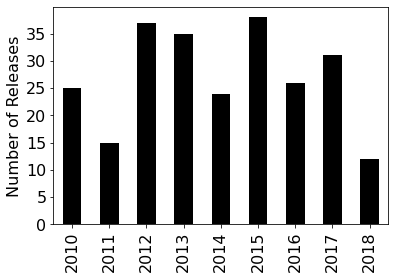

In [25]:
#q12

pastdecade_dict = {}

for i in range(2010,2019):
    pastdecade_dict[i] = 0
for year in range(len(movies)):
    if movies[year]["year"] >= 2010 and movies[year]["year"] <= 2018:
        if pastdecade_dict[movies[year]["year"]] == None:
            pastdecade_dict[movies[year]["year"]] = 1
        else:
            pastdecade_dict[movies[year]["year"]] += 1

plot_dict(pastdecade_dict, "Number of Releases")

In [26]:
#q13

available_years = {}
target_element = []
for i in range(len(movies)):
    if not (movies[i]["year"] in available_years):
            available_years[movies[i]["year"]] = 1
    else:
        available_years[movies[i]["year"]] += 1

target_element.append(max(available_years, key=available_years.get))

target_element

[2015]

In [27]:
#This function is pretty similar to question 8, but I rewrite due to the requirement of instruction
#This function returns the number of movies in this genre

def genre_sort(genre_name):
    count = 0
    for movie in movies:
        for genre in movie['genres']:
            if genre_name == genre:
                count += 1
    return count

In [28]:
#q14
#use the variable from question 8
genre_number = {}
for genre in genre_kinds:
    genre_number[genre] = genre_sort(genre)
sorted(genre_number, key = genre_number.get)[0:5]



['Music', 'Animation', 'Sport', 'Fantasy', 'Sci-Fi']

In [29]:
#q15

sorted(genre_number, key = genre_number.get, reverse = True)[0:5]

['Drama', 'Comedy', 'Crime', 'Romance', 'Action']

In [30]:
#q16

actor_dict = {}
for movie in range(len(movies)):
    for actor in movies[movie]["actors"]:
        if not(actor in actor_dict):
            actor_dict[actor] = 1
        else:
            actor_dict[actor] += 1
sorted(actor_dict, key = actor_dict.get, reverse = True)[0:10]

['John Wayne',
 'Eric Roberts',
 'Mickey Rooney',
 'Anthony Quinn',
 'Henry Fonda',
 'Randolph Scott',
 'Robert De Niro',
 'Robert Mitchum',
 'Glenn Ford',
 'George Sanders']

In [31]:
#q17

sorted(actor_dict, key = actor_dict.get, reverse = True)[0]

'John Wayne'

In [32]:
#q18

# single_movie_actor = []
# for actor in actor_dict.keys():
#     if actor_dict[actor] == 1:
#         single_movie_actor.append(actor)

# len(single_movie_actor)
#x:actor_dict[x]
result_dict = sorted(actor_dict.items(),key=lambda item:item[1])
num_count  = 0
for actor in range(len(result_dict)):
    if result_dict[actor][1] != 1:
        break
    else:
        num_count += 1
num_count

1926

In [33]:
#q19

great_rate = {}
for movie in range(len(movies)):
    if not(movies[movie]["title"] in great_rate):
        great_rate[movies[movie]["title"]] = movies[movie]["rating"]
        
sorted(great_rate, key = great_rate.get, reverse = True)[0:3]  

['The Godfather', 'The Godfather: Part II', 'The Dark Knight']

In [34]:
#q20

sorted(great_rate, key = great_rate.get)[0:19]  

['Silk',
 'Stealing Las Vegas',
 'Singularity',
 'Body and Soul',
 'Garden of the Dead',
 'Beyond the Ring',
 "Hitman's Run",
 'Betrayal',
 "Jake's Road",
 'The Trouble with Spies',
 '2 Bedroom 1 Bath',
 'Victim of Desire',
 'Arsenal',
 'Woman of Desire',
 'Sweet Justice',
 'Falcon Beach',
 'The Flying Dutchman',
 'The Mark: Redemption',
 'The Steam Experiment']